In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
import numpy as np
from matplotlib import pylab as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from scipy.optimize import minimize
%matplotlib inline

In [61]:
def f_real(x):
    return 0.5 * x + 1 + np.random.normal(0., 0.2)

In [62]:
def f_dep(x, k, b):
    return k * x + b

In [63]:
def f_conf(x):
    return -1 + np.random.normal(0., 0.2)

In [64]:
def generate_dataset(dataset_size):
    np.random.seed(18)
    result = []
    dataset_zip = 10.
    for x in np.arange(0, dataset_size / dataset_zip, 1. / dataset_zip):
        result.append((x, f_real(x)))
    return result

In [69]:
def generate_dataset_to_confuse(orig_dataset_size, dataset_size):
    np.random.seed(18)
    result = []
    dataset_zip = 10.
    for x in np.arange(0, orig_dataset_size / dataset_zip, (1. * orig_dataset_size) / (dataset_size * dataset_zip)):
        result.append((x, f_conf(x)))
    return result

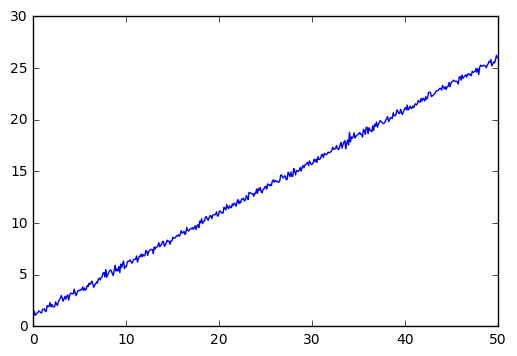

In [65]:
dataset = generate_dataset(500)
dataset_x = [x[0] for x in dataset]
dataset_y = [x[1] for x in dataset]
plt.plot(dataset_x, dataset_y)

In [66]:
def func_to_min(x, func):
    dep_func_res = map(lambda dx: f_dep(dx, x[0], x[1]), dataset_x)
    return func(dep_func_res, dataset_y)    

In [53]:
def func_to_min_mse(x):
    return func_to_min(x, mean_squared_error)

In [54]:
def func_to_min_mae(x):
    return func_to_min(x, mean_absolute_error)

In [55]:
optim_res = minimize(func_to_min_mse, [0., 0.])
print optim_res

      fun: 0.04082062523478882
 hess_inv: array([[ 0.00240001, -0.05988024],
       [-0.05988024,  1.99401198]])
      jac: array([  2.32830644e-09,   4.65661287e-10])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([ 0.49887882,  1.03080036])


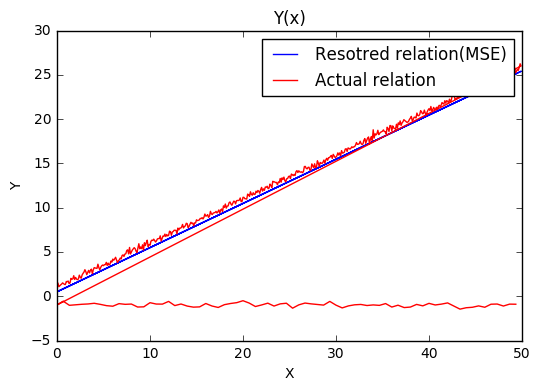

In [80]:
plt.plot(dataset_x, map(lambda x: f_dep(x, optim_res.x[0], optim_res.x[1]), dataset_x), 'b', dataset_x, dataset_y, 'r')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Y(x)")
plt.legend(['Resotred relation(MSE)', 'Actual relation'])
plt.show()

In [60]:
optim_res_mse = minimize(func_to_min_mse, [0., 0.])
optim_res_mae = minimize(func_to_min_mae, [0., 0.])
print "MSE: {}".format(optim_res_mse)
print "MAE: {}".format(optim_res_mae)

MSE:       fun: 0.04082062523478882
 hess_inv: array([[ 0.00240001, -0.05988024],
       [-0.05988024,  1.99401198]])
      jac: array([  2.32830644e-09,   4.65661287e-10])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([ 0.49887882,  1.03080036])
MAE:       fun: 0.16056836022250898
 hess_inv: array([[  3.06882407e-04,  -1.08472119e-02],
       [ -1.08472119e-02,   4.12665317e-01]])
      jac: array([ 0.0008,  0.    ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 382
      nit: 12
     njev: 93
   status: 2
  success: False
        x: array([ 0.49870365,  1.03944429])


In [71]:
dataset.extend(generate_dataset_to_confuse(500, 75))

In [78]:
dataset_x = [x[0] for x in dataset]
dataset_y = [x[1] for x in dataset]

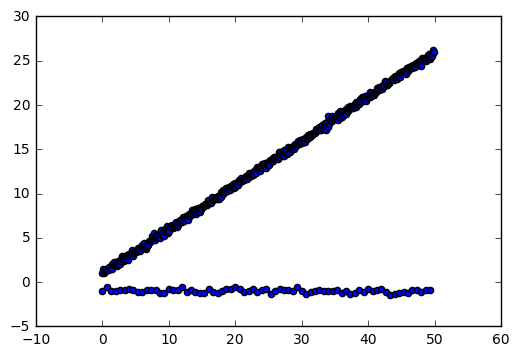

In [82]:
plt.scatter(dataset_x, dataset_y)

In [81]:
optim_res_mse = minimize(func_to_min_mse, [0., 0.])
optim_res_mae = minimize(func_to_min_mae, [0., 0.])
print "MSE: {}".format(optim_res_mse)
print "MAE: {}".format(optim_res_mae)

MSE:       fun: 29.30642672097311
 hess_inv: array([[ 0.00239995, -0.0597901 ],
       [-0.0597901 ,  1.98955196]])
      jac: array([  4.76837158e-07,  -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([ 0.43561997,  0.73916767])
MAE:       fun: 2.0053873599059777
 hess_inv: array([[ 0.00015442, -0.00258498],
       [-0.00258498,  0.08872802]])
      jac: array([-0.01078263,  0.00034285])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 428
      nit: 12
     njev: 104
   status: 2
  success: False
        x: array([ 0.49834388,  1.01588568])


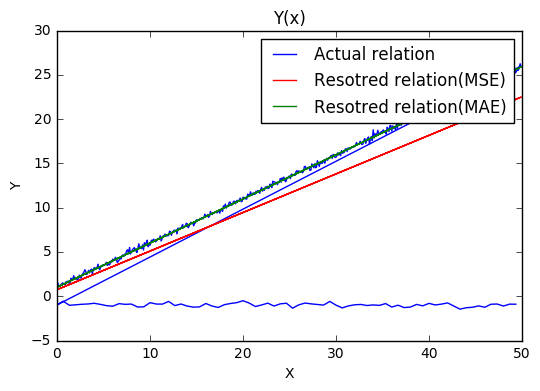

In [87]:
plt.plot(dataset_x, dataset_y, 'b', \
            dataset_x, map(lambda x: f_dep(x, optim_res_mse.x[0], optim_res_mse.x[1]), dataset_x), 'r', \
            dataset_x, map(lambda x: f_dep(x, optim_res_mae.x[0], optim_res_mae.x[1]), dataset_x), 'g')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Y(x)")
plt.legend(['Actual relation', 'Resotred relation(MSE)', 'Resotred relation(MAE)'])

### Вывод:

MAE более устойчиво к выбросам чем MSE.